In [1]:
import timeit
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt

from skimage.filters import gaussian
import pyclesperanto_prototype as proto
import pyclesperanto as cle

cle.select_device()
cle.set_wait_for_kernel_to_finish(True)

proto.select_device()
proto.set_wait_for_kernel_finish(True)

sizes = np.arange(1, 500, 10)
sigma = 10

warmup_iter = 1
eval_iter = 3

pyclesperanto version: 0.6.5


In [2]:
def mb_to_bytes(mb:int = 1) -> int:
    return mb * 1024 * 1024

def shape_from_elements(bytes:int) -> tuple:
    elements = bytes / 4
    shape = int(np.power(elements, 1/3))
    return (shape, shape, shape)

def generate_random_image(size:int = 128) -> np.ndarray:
    """
    Generates a random image of given size and sigma.
    """
    shape = shape_from_elements(mb_to_bytes(size))
    return np.random.rand(shape[0], shape[1], shape[2]).astype(np.float32)

def benchmark_function(target_function, operation:str, framework:str) -> pd.DataFrame:
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    benchmark_data = []
    for size in sizes:
        # make new data
        image = generate_random_image(size)
        size_mb = image.size * image.itemsize / 1024 / 1024
        # bind target function to given image
        partial_function = partial(target_function, image, sigma)
        # warmup       
        _ = timeit.timeit(partial_function, number=warmup_iter)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=eval_iter)
        
        print(f"Processing {image.shape} of {size_mb} Mb with {framework}... {time_in_s} s")

        # store results
        benchmark_data.append(pd.DataFrame({"benchmark": operation, "framework": framework, "size": size_mb, "time": time_in_s}, index=[0]))
    return pd.concat(benchmark_data)

# Gaussian Blur

### pyclesperanto-prototype

In [3]:
def prototype_function(image, sigma):
    proto.gaussian_blur(source=image, sigma_x=sigma, sigma_y=sigma, sigma_z=sigma)

In [4]:
prototype_benchmark_data = benchmark_function(prototype_function, "gaussian_blur", "prototype")

Processing (63, 63, 63) of 0.9538536071777344 Mb with prototype...
Processing (142, 142, 142) of 10.922576904296875 Mb with prototype...
Processing (176, 176, 176) of 20.796875 Mb with prototype...
Processing (201, 201, 201) of 30.97763442993164 Mb with prototype...
Processing (220, 220, 220) of 40.618896484375 Mb with prototype...
Processing (237, 237, 237) of 50.78145217895508 Mb with prototype...
Processing (251, 251, 251) of 60.3227653503418 Mb with prototype...
Processing (265, 265, 265) of 70.99008560180664 Mb with prototype...
Processing (276, 276, 276) of 80.202392578125 Mb with prototype...
Processing (287, 287, 287) of 90.17907333374023 Mb with prototype...
Processing (298, 298, 298) of 100.95059204101562 Mb with prototype...
Processing (307, 307, 307) of 110.37614059448242 Mb with prototype...
Processing (316, 316, 316) of 120.370849609375 Mb with prototype...
Processing (325, 325, 325) of 130.9514045715332 Mb with prototype...
Processing (333, 333, 333) of 140.8616523742675

### pyclesperanto

In [5]:
def pycle_function(image, sigma):
    cle.gaussian_blur(input_image=image, sigma_x=sigma, sigma_y=sigma, sigma_z=sigma)

In [6]:
pycle_benchmark_data = benchmark_function(pycle_function, "gaussian_blur", "pyclesperanto")

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto...
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto...
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto...
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto...
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto...
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto...
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto...
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto...
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto...
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto...
Processing (298, 298, 298) of 100.95059204101562 Mb with pyclesperanto...
Processing (307, 307, 307) of 110.37614059448242 Mb with pyclesperanto...
Processing (316, 316, 316) of 120.370849609375 Mb with pyclesperanto...
Processing (325, 325, 325) of 130.9514045715332 Mb with pyclespe

### Skimage

In [7]:
def skimage_function(image, sigma):
    gaussian(image, sigma)

In [8]:
skimage_benchmark_data = benchmark_function(skimage_function, "gaussian_blur", "skimage")

Processing (63, 63, 63) of 0.9538536071777344 Mb with skimage...
Processing (142, 142, 142) of 10.922576904296875 Mb with skimage...
Processing (176, 176, 176) of 20.796875 Mb with skimage...
Processing (201, 201, 201) of 30.97763442993164 Mb with skimage...
Processing (220, 220, 220) of 40.618896484375 Mb with skimage...
Processing (237, 237, 237) of 50.78145217895508 Mb with skimage...
Processing (251, 251, 251) of 60.3227653503418 Mb with skimage...
Processing (265, 265, 265) of 70.99008560180664 Mb with skimage...
Processing (276, 276, 276) of 80.202392578125 Mb with skimage...
Processing (287, 287, 287) of 90.17907333374023 Mb with skimage...
Processing (298, 298, 298) of 100.95059204101562 Mb with skimage...
Processing (307, 307, 307) of 110.37614059448242 Mb with skimage...
Processing (316, 316, 316) of 120.370849609375 Mb with skimage...
Processing (325, 325, 325) of 130.9514045715332 Mb with skimage...
Processing (333, 333, 333) of 140.86165237426758 Mb with skimage...
Process

## Results

Text(0.5, 1.0, 'Gaussian blur')

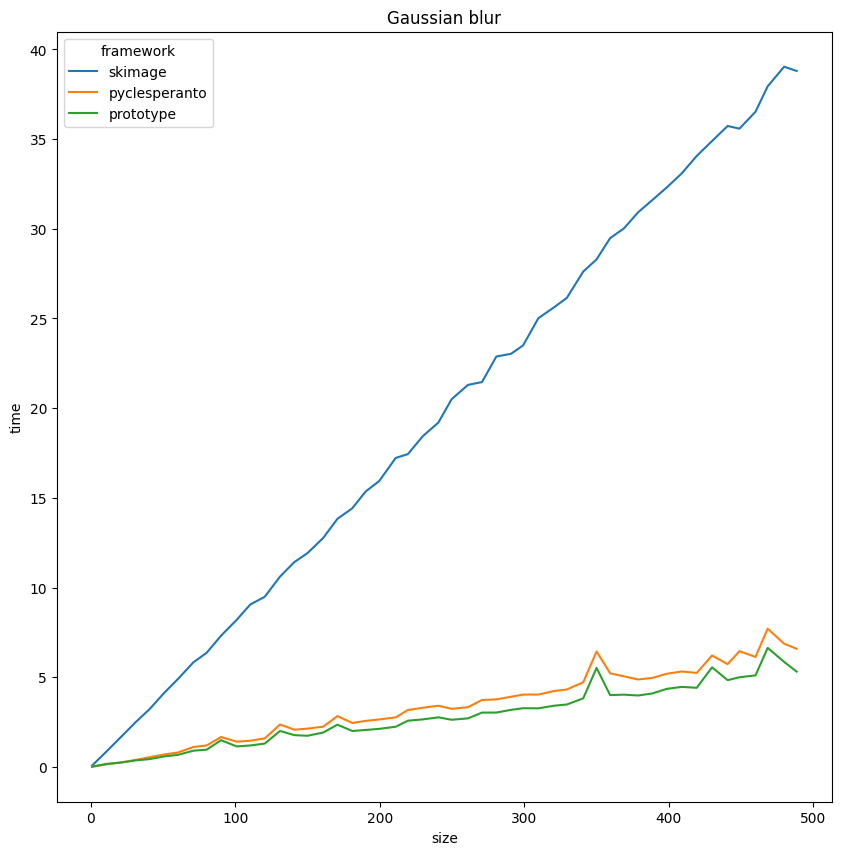

In [9]:
import seaborn as sns

bench = pd.concat([skimage_benchmark_data, pycle_benchmark_data, prototype_benchmark_data])

fig, axs = plt.subplots(1,1,figsize=(10, 10))
sns.lineplot(data=bench, x="size", y="time", hue="framework", ax=axs)
axs.set_title("Gaussian blur")